In [218]:
#gerekli kütüphanelerin yüklenmesi
# -*- coding:utf-8 -*-
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [222]:
#colab ile bilgisayardan dosya yükleme
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving izmir-deprem-veriseti.tsv to izmir-deprem-veriseti (1).tsv
User uploaded file "izmir-deprem-veriseti.tsv" with length 2659567 bytes


In [223]:
#id_str, text, time ve sentiment sütunları
cols = ['id_str','text','time','sentiment']

In [224]:
#dosyayı okuma
df = pd.read_csv(r"izmir-deprem-veriseti.tsv",header=None, names=cols,sep="\t")

In [225]:
#yüklenen dosyayı görüntüleme işlemi
# -*- coding:utf-8 -*-
df.head(15)

id_str  ...  sentiment
0                id_str  ...  sentiment
1   1329932276659064835  ...          4
2   1329929951810899977  ...          2
3   1329929719295295488  ...          2
4   1329927656733876225  ...          4
5   1329924216494370816  ...          0
6   1329923473616105476  ...          0
7   1329917393620131846  ...          2
8   1329914997150015490  ...          2
9   1329904468343869446  ...          2
10  1329904117435822082  ...          0
11  1329902095999377408  ...          2
12  1329902031558074374  ...          2
13  1329900037091053571  ...          0
14  1329898364142546945  ...          0

[15 rows x 4 columns]

In [226]:
#yüklenen dosya hakkında bilgiler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10740 entries, 0 to 10739
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_str     10740 non-null  object
 1   text       10740 non-null  object
 2   time       10740 non-null  object
 3   sentiment  10717 non-null  object
dtypes: object(4)
memory usage: 335.8+ KB


In [227]:
#sentiment sütunundaki verilerin sayısı
df.sentiment.value_counts()

0            7495
2            1740
4            1481
sentiment       1
Name: sentiment, dtype: int64

In [228]:
#text sütunundaki verilerin sayısı
df.text.value_counts()

RT @ege_in: İzmir Furkan Gönüllüleri bir farkındalık oluşturarak depremzedelere kebap ikramı yapmaktadır. Bu zor süreçi hep beraber atlatacağız. 🤗🥰  #izmir #izmirdepreminde #izmirdeprem #izmirinyanındayız #kardeşlik #izmirgecmisolsun https://t.co/yGzdESiaGZ                                                      257
RT @tekinndenizz: Elinize alın kumandayı, sıra sıra tüm kanalları gezin televizyonda haber gösteren her kanalın tek noktasıdır #itfaiye sessiz kahramanlaridir. Ülkemizin Sahipsiz,Pelerinsiz kahramanlari... #itfaiye  #izmirdeprem  @ITFADER #destekolunmeslekolalım https://t.co/WKn5SxbUKK                         178
RT @ege_in: İzmir Furkan Gönüllüleri olarak depremzedelere bugün 300 kişilik yemek dağıttık. Bu zor süreçi hep beraber atlatacağız. 🤗  #izmir #i̇zmir #izmirdeprem #deprem #kardeşlik #gıda #gıdayardımı https://t.co/EuZjaQBa8t                                                                                        73
RT @yalcinpenbe: Can bu alınıp satılmaz. İğne batsa acı

In [229]:
df.head()

id_str  ...  sentiment
0               id_str  ...  sentiment
1  1329932276659064835  ...          4
2  1329929951810899977  ...          2
3  1329929719295295488  ...          2
4  1329927656733876225  ...          4

[5 rows x 4 columns]

In [230]:
#duplicate veriler temizlendi.
df = df.drop_duplicates(subset = ['text', 'id_str','time'], keep = 'first')
display(df)

id_str  ...  sentiment
0                   id_str  ...  sentiment
1      1329932276659064835  ...          4
2      1329929951810899977  ...          2
3      1329929719295295488  ...          2
4      1329927656733876225  ...          4
...                    ...  ...        ...
10735  1323872818078113793  ...          0
10736  1323872694815936512  ...          0
10737  1323872539349843968  ...          4
10738  1323872492482662401  ...          4
10739  1323872247648571392  ...          4

[10660 rows x 4 columns]

In [231]:
#Beautiful soup kütüphanesinin html, xml i metne dönüştürmek için yüklenmesi
from bs4 import BeautifulSoup
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [232]:
#deneme için 50.indexteki verinin çekilmesi
df.text[50]

'Adım Keti Depremzedeyim. Evime döndüm. İzmir depreminden beri, çatılarda, bacalarda, bir yerlerde mahsur kaldım. Kemiklerim sayılıyor açlıktan. Annem beni besledi, atik evimdeyim, güvendeyim. #depremzedekedi #izmirdepremi https://t.co/lajGZje8fx'

In [233]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[50], 'lxml')
print (example1.get_text())

Adım Keti Depremzedeyim. Evime döndüm. İzmir depreminden beri, çatılarda, bacalarda, bir yerlerde mahsur kaldım. Kemiklerim sayılıyor açlıktan. Annem beni besledi, atik evimdeyim, güvendeyim. #depremzedekedi #izmirdepremi https://t.co/lajGZje8fx


In [235]:
#150.indexdeki verinin çekilmesi
df.text[150]

"RT @o8kn35: Cağnım İzmir'im titreşimde unutulmuş gibi. #deprem #izmirdepremi"

In [236]:
#150. indexdeki verideki @ işaretli veriyi temizleme
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[150])

"RT : Cağnım İzmir'im titreşimde unutulmuş gibi. #deprem #izmirdepremi"

In [237]:
#1.indexdeki veriyi çekme
df.text[1]

"RT @havarhayook: 58 saat sonra gelen mucize. Emrah Apartmanı'nda enkaz altında kalan iki kız kardeşten biri olan 14 yaşındaki İdil Şirin, sağ olarak çıkarıld.  #deprem #izmirdepremi https://t.co/HPDUNatRPJ"

In [238]:
#1.indexteki veriden https gibi işaretli verileri temizleme 
re.sub('https?://[A-Za-z0-9./]+','',df.text[1])

"RT @havarhayook: 58 saat sonra gelen mucize. Emrah Apartmanı'nda enkaz altında kalan iki kız kardeşten biri olan 14 yaşındaki İdil Şirin, sağ olarak çıkarıld.  #deprem #izmirdepremi "

In [243]:
df.text[500]

'RT @GozgozYaninda: Göztepe taraftarları olarak, son yara sarılıncaya kadar yardımlara devam ediyoruz.  #Göztepe #izmirdepremi https://t.co/aSWyQrCegd'

In [244]:
#500.indexdeki verideki gereksizleri temizleme
re.sub("[^a-zA-Z]", " ", df.text[500])


'RT  GozgozYaninda  G ztepe taraftarlar  olarak  son yara sar l ncaya kadar yard mlara devam ediyoruz    G ztepe  izmirdepremi https   t co aSWyQrCegd'

In [245]:
#500.indexli veride RT leri temizleme
df.text[500].replace("RT", " ")


'  @GozgozYaninda: Göztepe taraftarları olarak, son yara sarılıncaya kadar yardımlara devam ediyoruz.  #Göztepe #izmirdepremi https://t.co/aSWyQrCegd'

In [246]:
#nltk küyüphanesinin yüklenmesi
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [247]:
#veri setini temizlemek için fonksiyonun yazılması
pat1 = r'@[A-Za-z0-9 _]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'www.[^ ]+'
combined_pat = r'|'.join((pat1, pat2, pat3))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try: #karakter sorunlarından dolayı ü-ü, ğ-g, ş-s, ç-c, ö-o ve i-ı yapıldı. ve RT işlemleri temizlendi. kalma ihtimaline göre https ve www ifadelerinin yerine boşluk konuldu.
        clean = stripped.replace(u"ü","u").replace(u"ğ", "g").replace(u"ş", "s").replace(u"ç", "c").replace(u"ö", "o").replace(u"ı", "i").replace("RT", " ").replace("https", " ").replace("www", " ")
        
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    #veriler küçük harfe dönüşyütüldü ve boşluklar temizlendi
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [249]:
#6420 tane veriyi temizleme 
testing = df.text[:6420]

In [250]:
#test_result ın içine temizlenmiş veriyi atma 
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))


In [251]:
#temizlenmiş veriler
test_result

['text',
 'saat sonra gelen mucize emrah apartmani nda enkaz altinda kalan iki kiz kardesten biri olan yasindaki dil irin sag olarak cikarild deprem izmirdepremi',
 'kayipkedi izmirdepremi kedisahiplendirme yilmazerbek t co yz fqtpa',
 'kayipkedi izmirdepremi kedisahiplendirme yilmazerbek t co yz fqtpa',
 'saat sonra gelen mucize emrah apartmani nda enkaz altinda kalan iki kiz kardesten biri olan yasindaki dil irin sag olarak cikarild deprem izmirdepremi',
 'unuttunuz coktan degil mi izmirdepremi',
 'gunduz trafigi etkilememek icin depremde agir hasar almis ishani gece yikimi basladi izmirdepremi izmir ankaya konak',
 'izmirearthquake izmir izmirdepremi izmirdeprem',
 'kayipkedi izmirdepremi kedisahiplendirme yilmazerbek t co yz fqtpa',
 'kayipkedi izmirdepremi kedisahiplendirme yilmazerbek t co yz fqtpa',
 'ekrem mamoglu na stanbul u sel basti beyefendi tatilde diyen erdogan zmir de deprem olmusken yurttas olmus yuzlerce yarali varken van da gule oynaya il mitingi yapiyor izmirdepremi

In [252]:
 # veriyi temizlemeye verdik
nums = [0,6420]

In [253]:
# duplicate verilerin de silinmesiyle temizlenmiş verinin uzunluğu 6420 dir.
len(test_result)

6420

In [255]:
# veride text ve sentiment alanları temizlendi. sentiment, target olarak atandı.
clean_df = pd.DataFrame(test_result,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
#veri clean_tweet dosyasına kaydedildi.
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

text     target
0                                               text  sentiment
1  saat sonra gelen mucize emrah apartmani nda en...          4
2  kayipkedi izmirdepremi kedisahiplendirme yilma...          2
3  kayipkedi izmirdepremi kedisahiplendirme yilma...          2
4  saat sonra gelen mucize emrah apartmani nda en...          4

In [256]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head(6420)

text     target
0                                                  text  sentiment
1     saat sonra gelen mucize emrah apartmani nda en...          4
2     kayipkedi izmirdepremi kedisahiplendirme yilma...          2
3     kayipkedi izmirdepremi kedisahiplendirme yilma...          2
4     saat sonra gelen mucize emrah apartmani nda en...          4
...                                                 ...        ...
6415  izmirinyanindayiz izmirdeprem izmir aydabebek ...          0
6416  gunluk programdan yazilacak cok sey var da zmi...          0
6417                                        izmirdeprem          0
6418  deprem faturasini hukumete kesmeye calisan chp...          0
6419  deprem faturasini hukumete kesmeye calisan chp...          0

[6420 rows x 2 columns]

In [257]:
#clean_tweet dosyasının bilgiisne bakıldı.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420 entries, 0 to 6419
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6420 non-null   object
 1   target  6341 non-null   object
dtypes: object(2)
memory usage: 150.5+ KB


In [258]:
# pandas.DataFrame.fillna yardımı NaN veriler dolduruldu.
my_df['target'] = my_df['target'].fillna(method = 'ffill')
display(my_df)

text     target
0                                                  text  sentiment
1     saat sonra gelen mucize emrah apartmani nda en...          4
2     kayipkedi izmirdepremi kedisahiplendirme yilma...          2
3     kayipkedi izmirdepremi kedisahiplendirme yilma...          2
4     saat sonra gelen mucize emrah apartmani nda en...          4
...                                                 ...        ...
6415  izmirinyanindayiz izmirdeprem izmir aydabebek ...          0
6416  gunluk programdan yazilacak cok sey var da zmi...          0
6417                                        izmirdeprem          0
6418  deprem faturasini hukumete kesmeye calisan chp...          0
6419  deprem faturasini hukumete kesmeye calisan chp...          0

[6420 rows x 2 columns]

In [266]:
my_df.target.value_counts()

0            3577
2            1719
4            1123
sentiment       1
Name: target, dtype: int64

In [267]:
# veride text ve sentiment alanları temizlendi. sentiment, target olarak atandı.
clean_df = pd.DataFrame(test_result,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
#veri clean_tweet dosyasına kaydedildi.
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

text     target
0                                               text  sentiment
1  saat sonra gelen mucize emrah apartmani nda en...          4
2  kayipkedi izmirdepremi kedisahiplendirme yilma...          2
3  kayipkedi izmirdepremi kedisahiplendirme yilma...          2
4  saat sonra gelen mucize emrah apartmani nda en...          4

In [286]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420 entries, 0 to 6419
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6420 non-null   object
 1   target  6341 non-null   object
dtypes: object(2)
memory usage: 150.5+ KB


In [271]:
#sentiment analiz için kütüphaneler eklendi.
#Öncelikle kullanacağımız python kütüphanaelerini ekliyerek çalışmamıza başlıyoruz
import numpy as np #Bu kütüphane lineer cebir için kullandığımız kütüphane fonksiyonlarını içeriyor
import pandas as pd # verilerimizi işlemek için pandas kütüphanesini kullanıyoruz(örn pd.read_scv)
from sklearn.model_selection import train_test_split #Bu işlem ile verilerimizi eğitim ve test(%70-%30) olacak çekilde bölüyoruz
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [273]:
veri = pd.read_csv('/content/clean_tweet.csv')
#Veri setinde sadece ihtiyacım olacak sütunlar kalıyor.
veri = veri[['text', 'target']]

In [274]:
#Veri Setimi Eğitim ve test verilerine ayırıyorum
train, test = train_test_split(veri, test_size = 0.1)
#Sonra Veri seti içerisindeki Nötr duyguları çıkarıyorum
train = train[train.target !="2"]

Pozitif Kelimeler


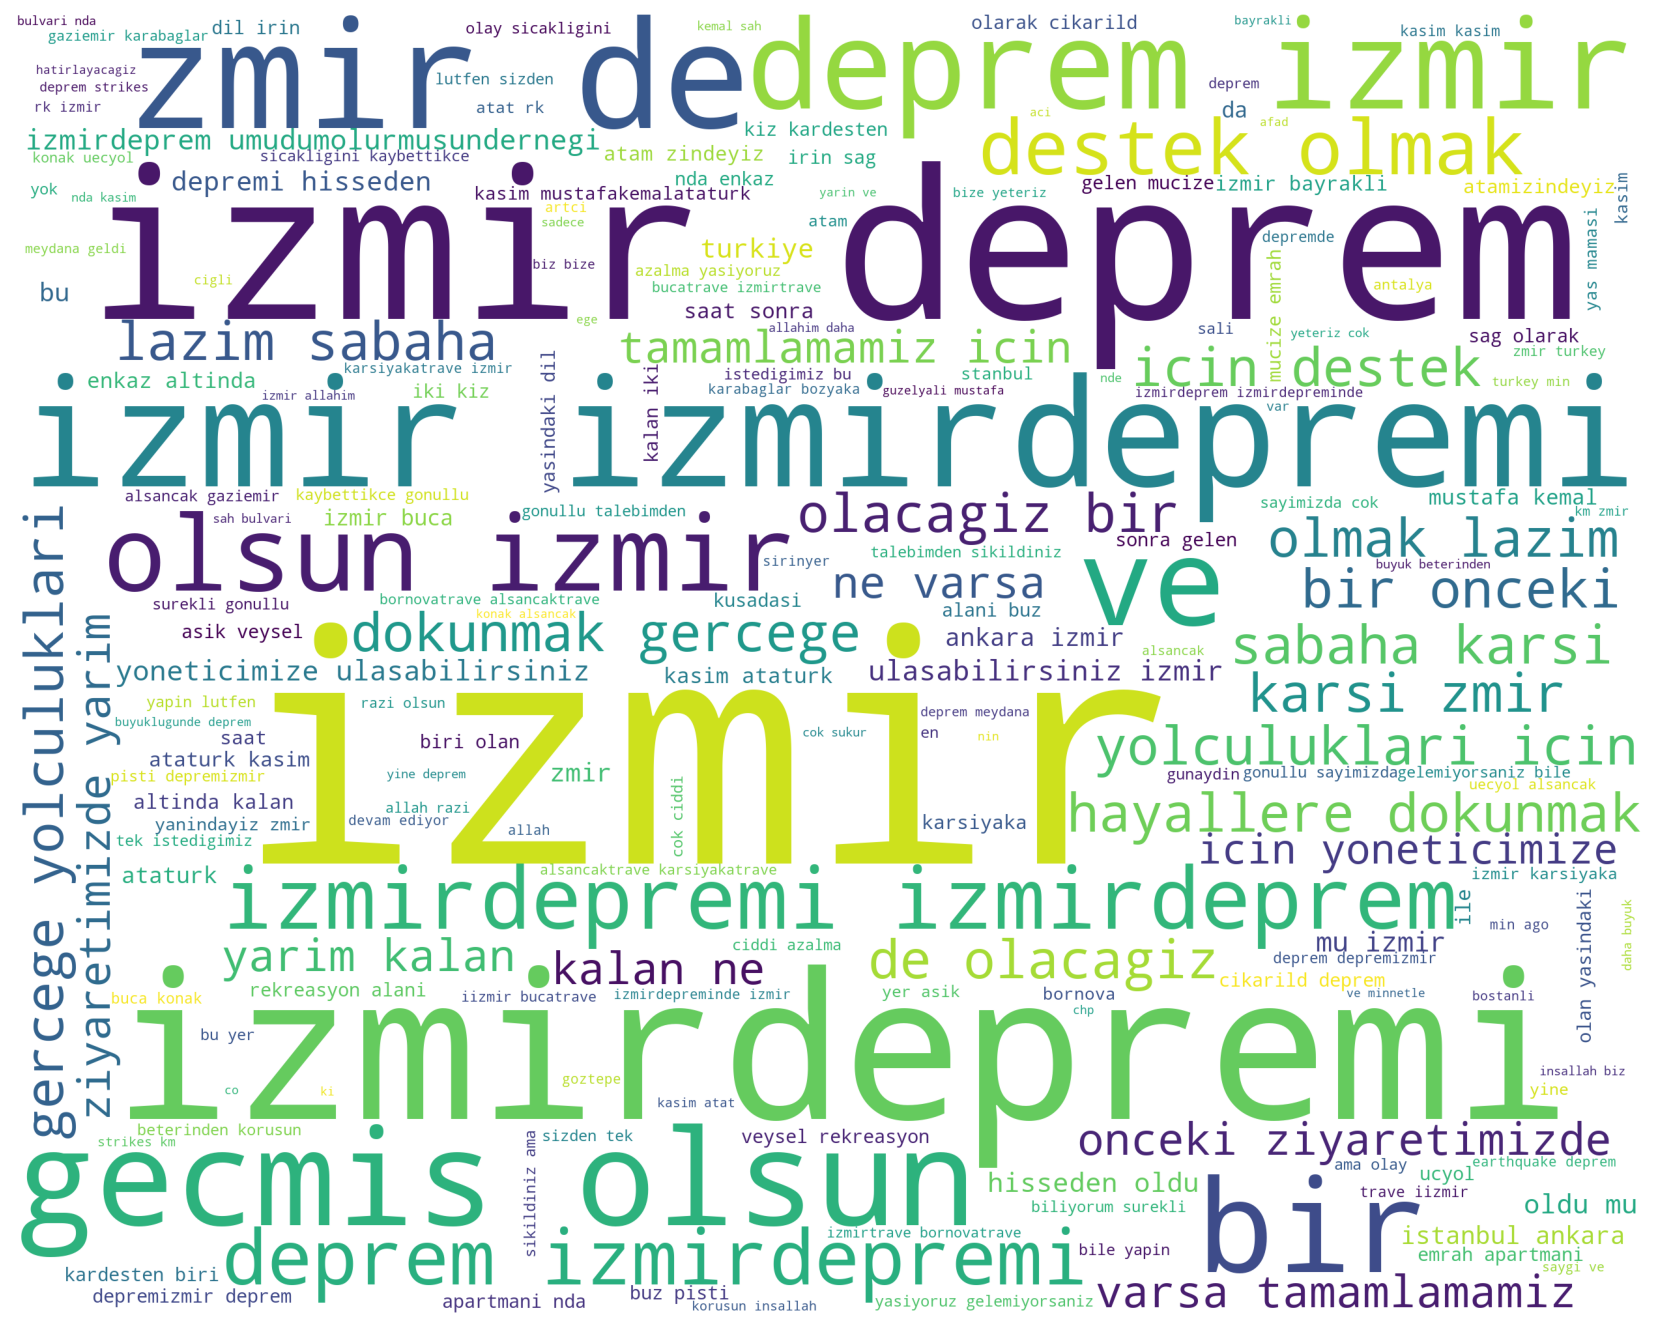

Negatif Kelimeler


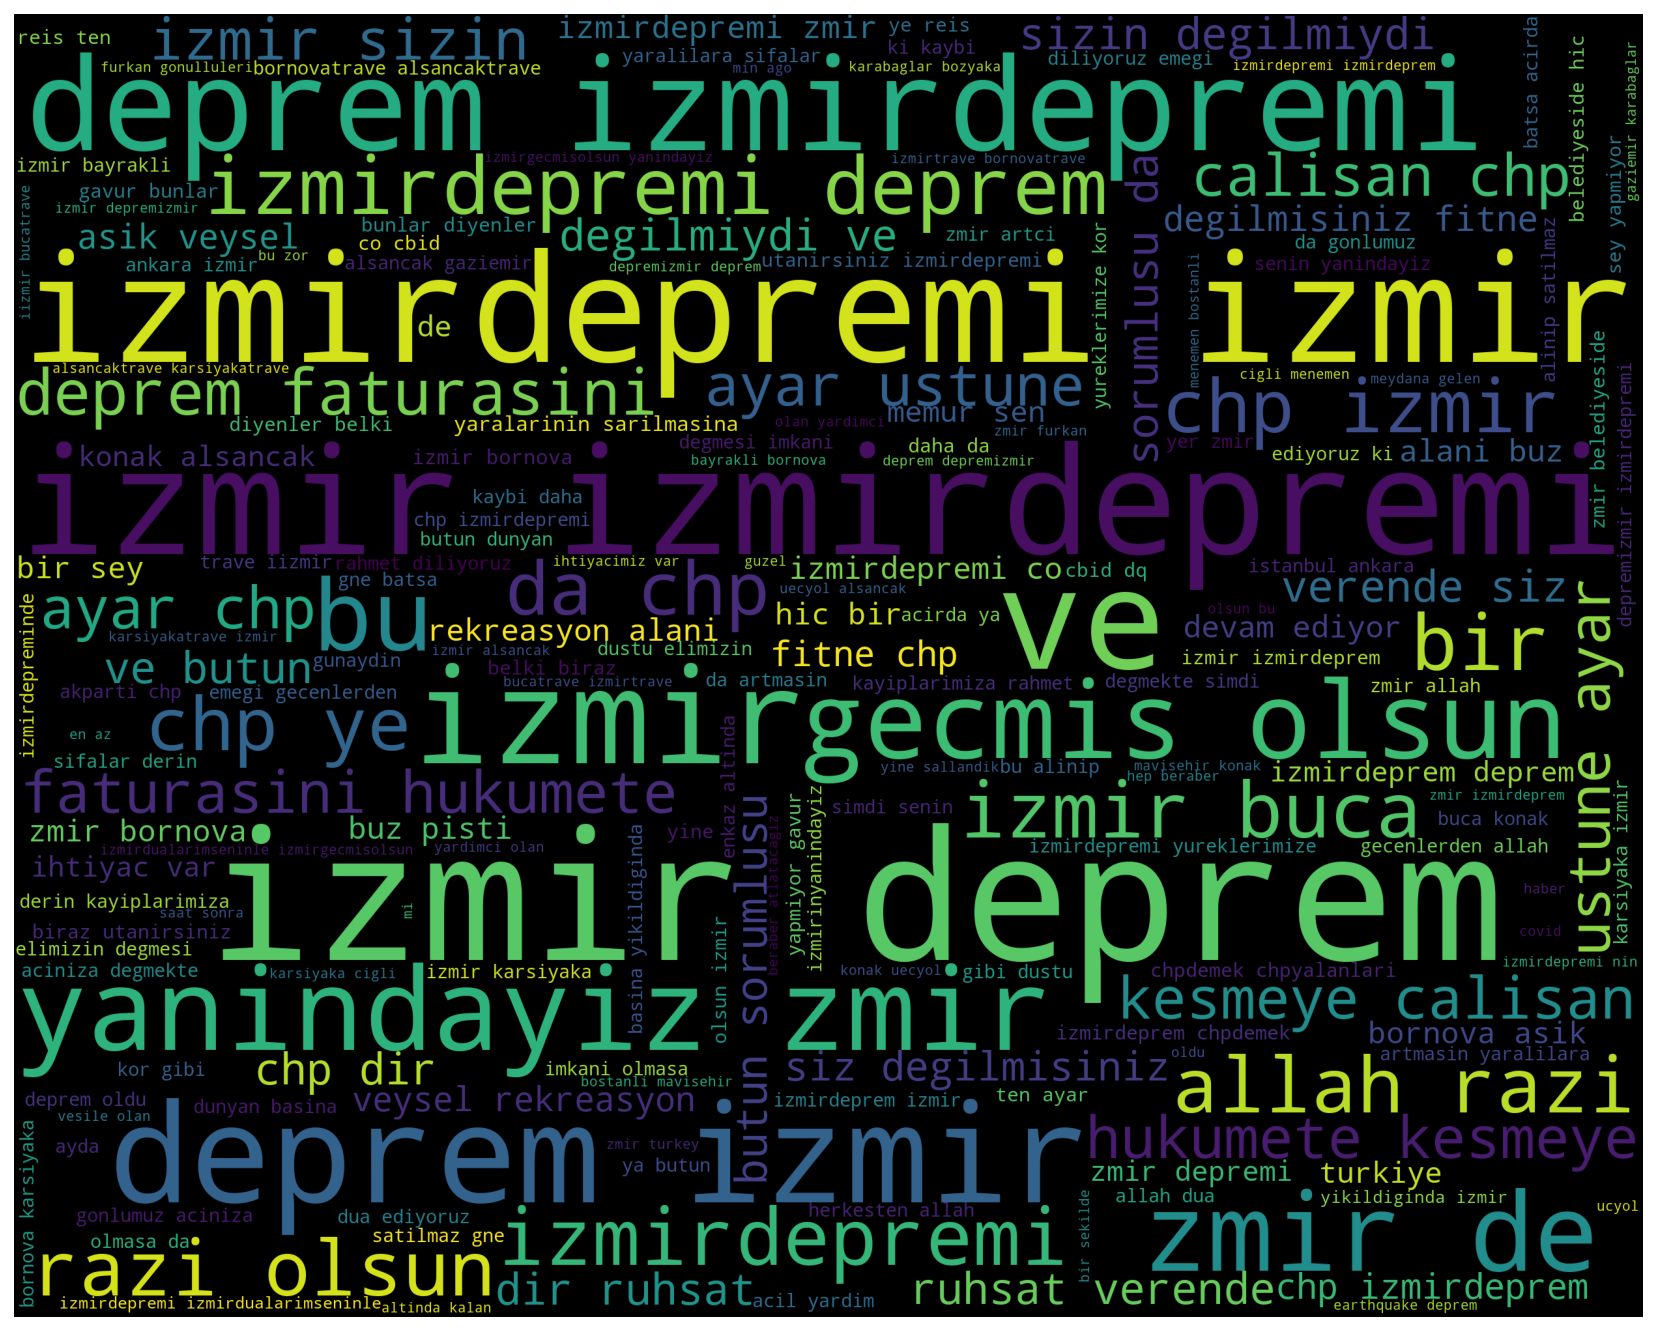

In [275]:
#4 pozitif, 0 negatif verilerim
#tekrardan temizlenmiş veriyi temizleme fonksiyonuna vererek kontrol ediyorum
train_pos = train[ train['target'] == '4']
train_pos = train_pos['text']
train_neg = train[ train['target'] == '0']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
 #temzilenmiş veriden pozitif ve negatif kelime bulutu oluşturuyorum.
print("Pozitif Kelimeler")
wordcloud_draw(train_pos,'white')
print("Negatif Kelimeler")
wordcloud_draw(train_neg)

In [276]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [277]:
from nltk.corpus import stopwords

# Türkçe engellenecek kelimeleri çıkartıyoruz.
stoplist = stopwords.words('turkish')

print(stoplist)

['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']


In [278]:
#Türkçe stopwordler temizleniyor ve her ihtimale karşı clean_tweet dosyası tekrardan temizlik kontrolünden geçiriliyor. 
from wordcloud import WordCloud, STOPWORDS
tweets =[]
stopwords_set = set(stopwords.words("turkish"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
                    if 'http' not in word
                    and not word.startswith('@')
                    and not word.startswith('#')
                    and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned, row.target))
    
test_pos = test[test['target'] == '4']
test_pos = test_pos['text']
test_neg = test[test['target'] == '0']
test_neg = test_neg['text']

In [279]:
#temizlediğimiz veriden en çok özellikli kelimeleri görselleştiriyoruz. Bunun için nltk kullanıyoruz.
def get_words_in_tweets(tweets):
    all =[]
    for (words, sentiment) in tweets:
        all.extend(words)
    return all
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

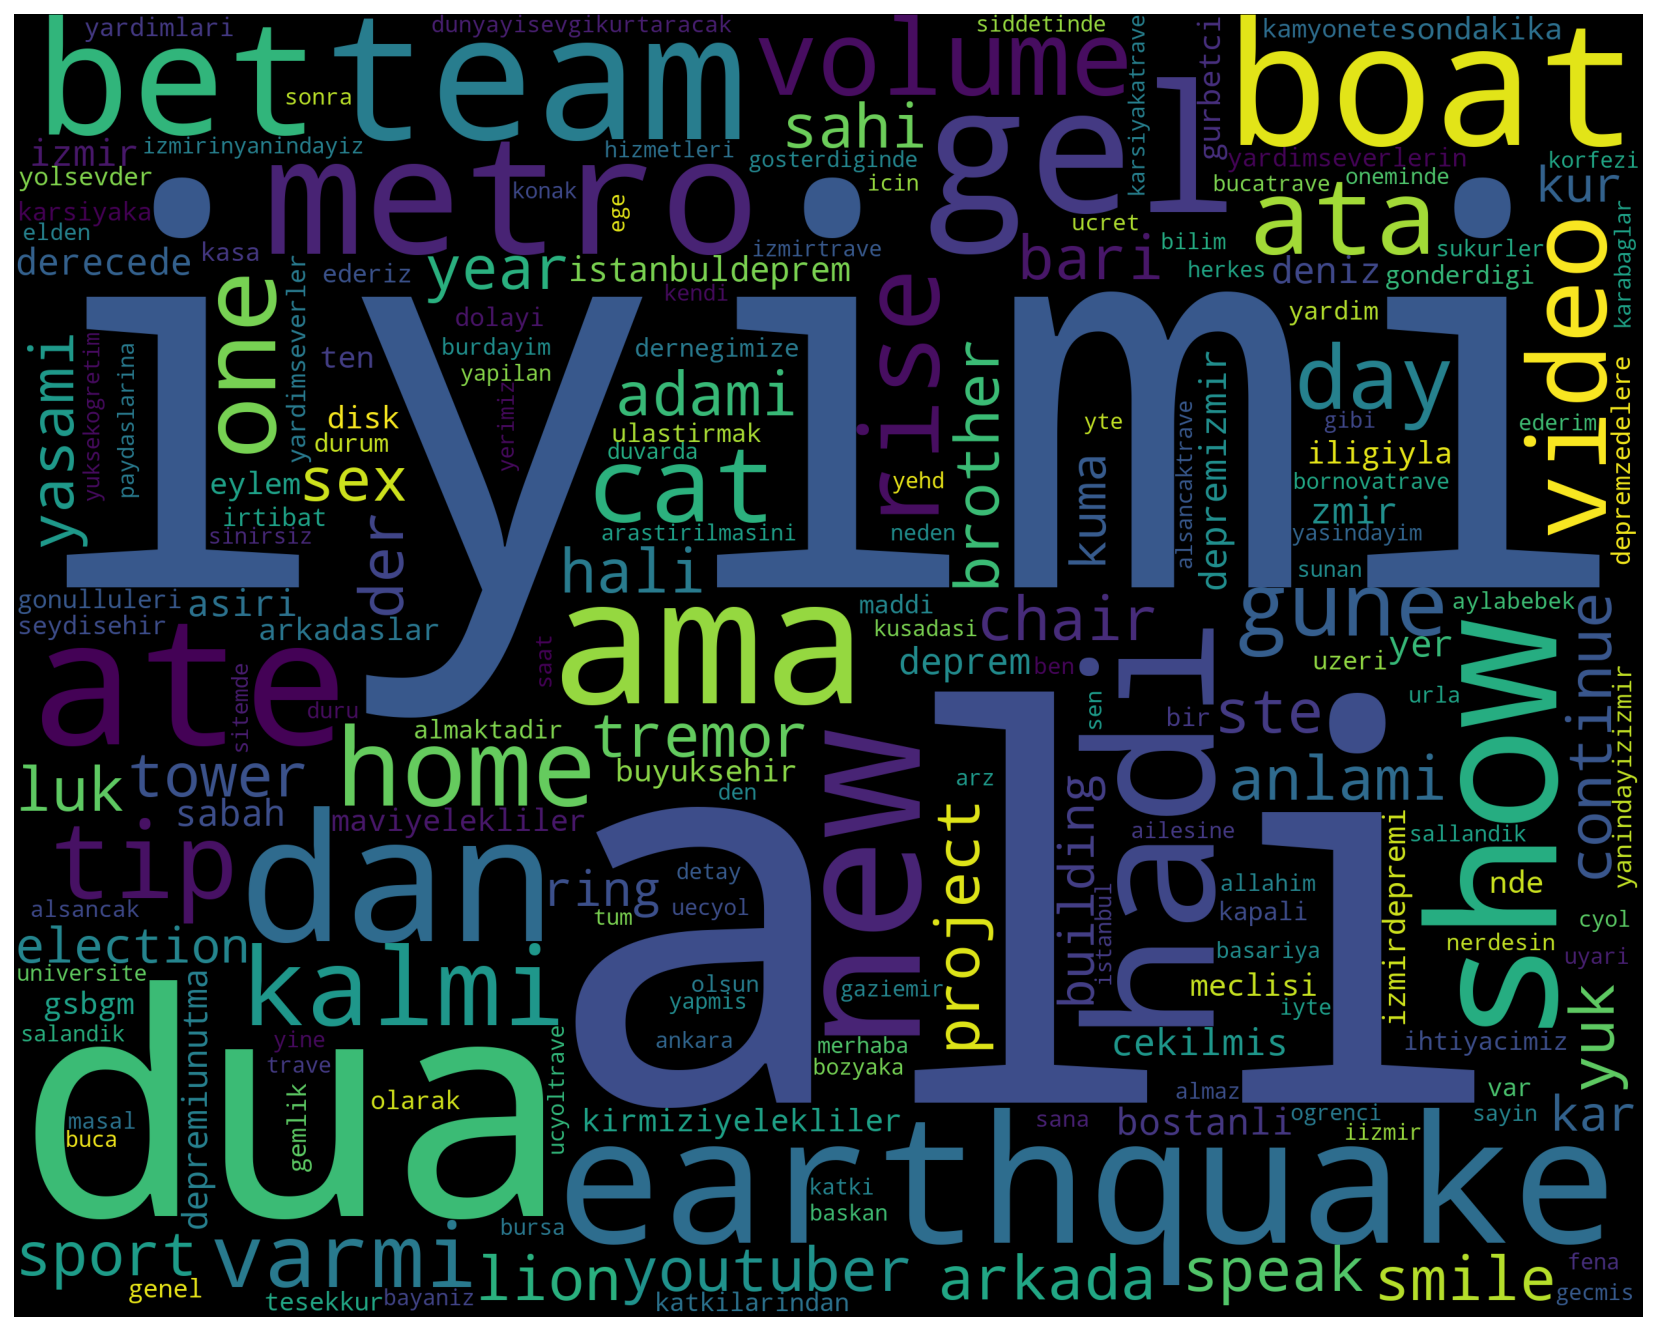

In [280]:
#word cloud ile en çok kullanılan kelimeleri görselleştiriyoruz.
wordcloud_draw(w_features)

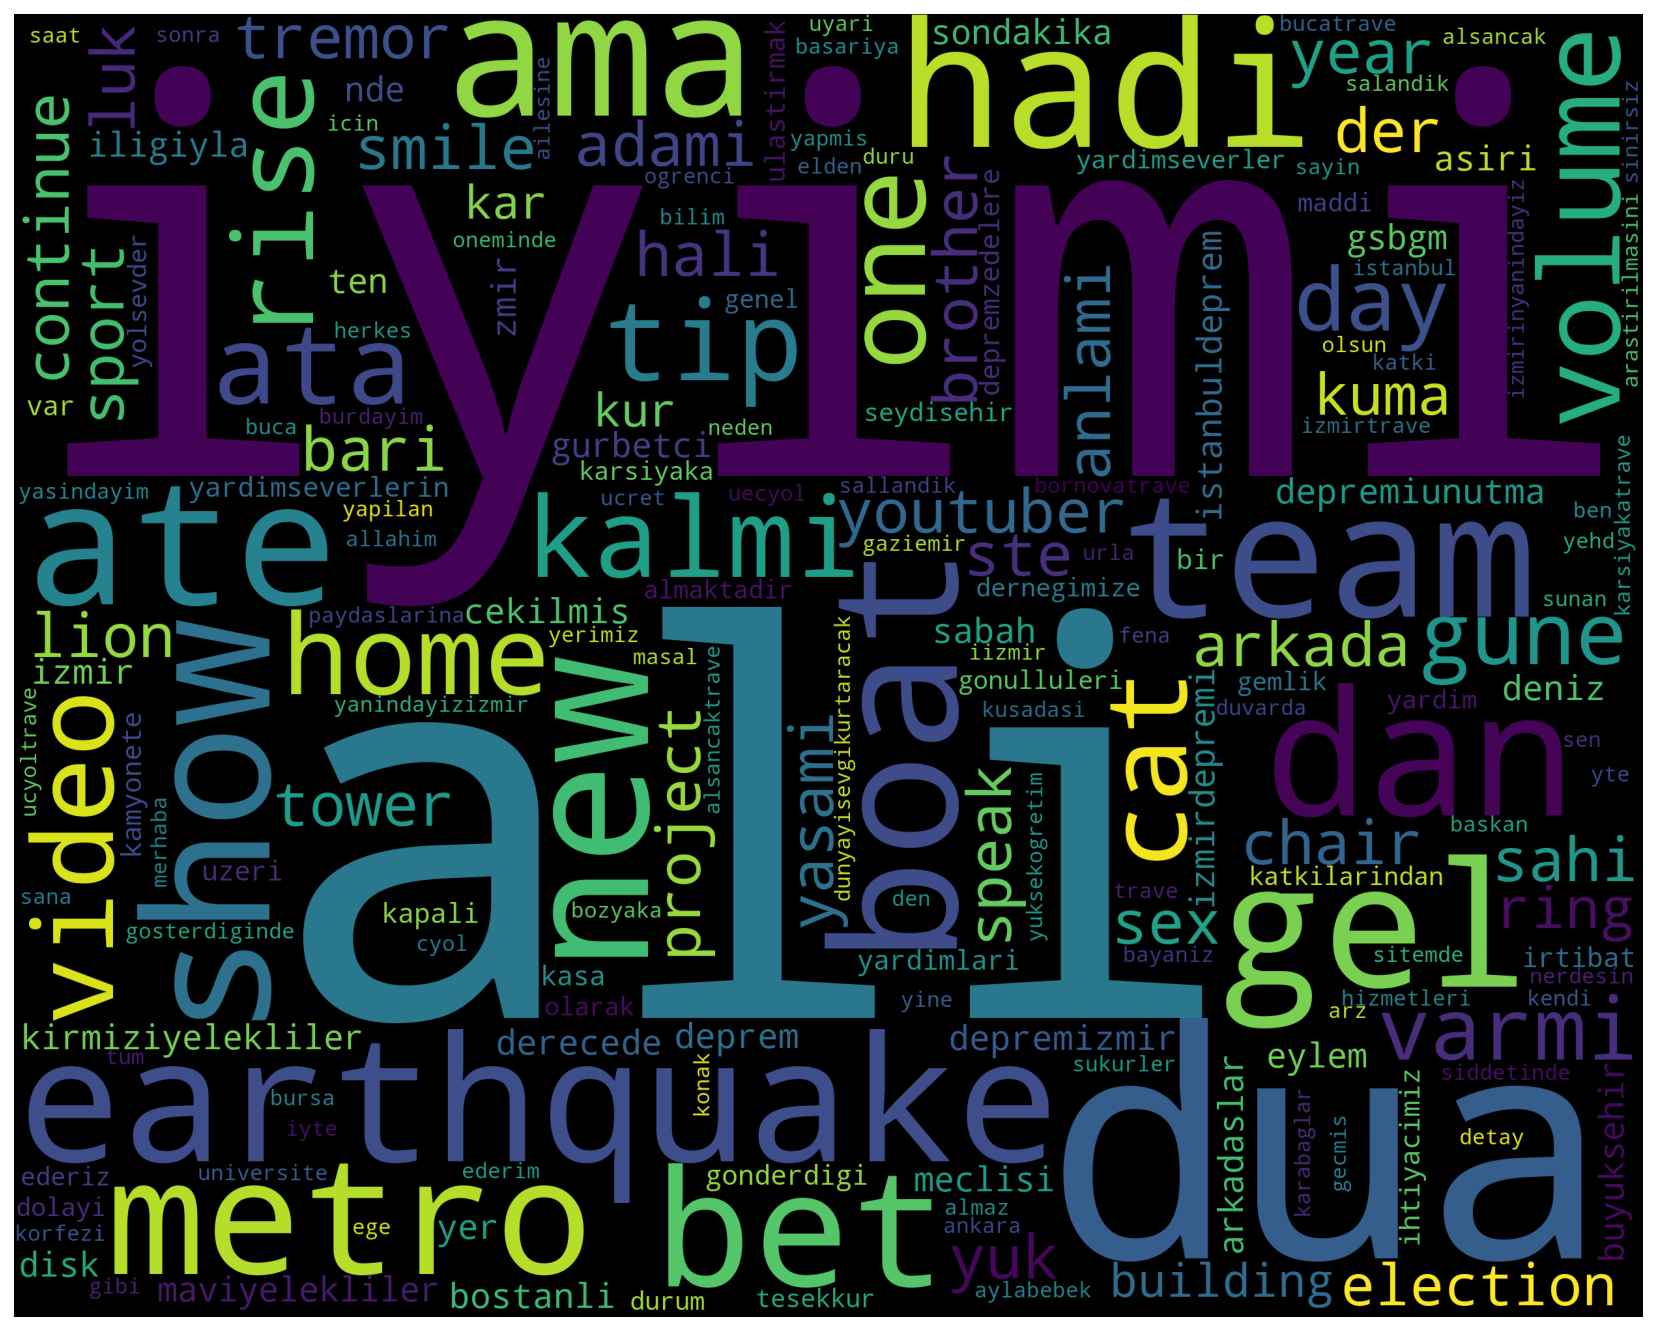

In [281]:
wordcloud_draw(w_features)

In [282]:
#Naive Bayes sınıflandırıcıyı eğitiyorum
training_set = nltk.classify.apply_features(extract_features, tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [283]:
#Naive bayes ile pozitif ve negatif tweetler skorlanıyor.
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res = classifier.classify(extract_features(obj.split()))
    if(res == '0'):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res = classifier.classify(extract_features(obj.split()))
    if(res == '4'):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s' % (len(test_neg), neg_cnt))
print('[Positive]: %s/%s' % (len(test_pos), pos_cnt))

[Negative]: 363/328
[Positive]: 105/42


In [287]:
#bir lstm modeli oluşturarak verimize anlamsal ve sıralı olarak ya yaklaşıp accuracysine bakıyoruz.
import numpy as np 
import pandas as pd 
#lstm modeli için keras kütüphanelerini yüklüyoruz.
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [288]:
#temizlenmiş verimizi yüklüyoruz
data = pd.read_csv('/content/clean_tweet.csv')
# gerekli sütunları çekiyoruz
data = data[['text','target']]

In [290]:
data = data[data.target != "2"]
#nötr veriyi burada da çıkarıyoruz. negatif ve pozitif üzerinden ilerliyoruz

print(data[ data['target'] == '4'].size)
print(data[ data['target'] == '0'].size)

max_fatures = 100
#veriyi tokenize ederek pozitif negatif verilerin sayısına bakıyoruz.
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

2220
7088


In [291]:
#lstm modelimiz 4 katmandan oluşmaktadır. Daha doğru sonuçlar almak için parametreler değiştirilebilir.
embed_dim = 256
lstm_out = 32

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 656, 256)          25600     
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 656, 256)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                36992     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 62,691
Trainable params: 62,691
Non-trainable params: 0
_________________________________________________________________
None


In [292]:
#test size ve random size değerlerini belirterek target sütunu üzerinden ilerliyoruz.
Y = pd.get_dummies(data['target']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
#veriyi reshape ediyoruz
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3171, 656) (3171, 3)
(1563, 656) (1563, 3)


In [294]:
#batch size belirleyip modeli eğitiyoruz.
batch_size = 32
model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, verbose = 2)

Epoch 1/5
100/100 - 99s - loss: 0.5176 - accuracy: 0.7663
Epoch 2/5
100/100 - 98s - loss: 0.4913 - accuracy: 0.7802
Epoch 3/5
100/100 - 98s - loss: 0.4813 - accuracy: 0.7846
Epoch 4/5
100/100 - 98s - loss: 0.4757 - accuracy: 0.7941
Epoch 5/5
100/100 - 98s - loss: 0.4709 - accuracy: 0.8007


In [295]:
#modelimizin accuracy ve score değerini hesaplıyoruz
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

2/2 - 1s - loss: 0.5034 - accuracy: 0.8254
score: 0.50
acc: 0.83


In [296]:
#negatif ve pozitif veriyi doğrulama oranına bakıyoruz.
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1

print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1

In [300]:
#herhangi bir tweetin negatif mi pozitif mi olduğuna bakıyoruz.
twt = ['unuttunuz coktan degil mi izmirdepremi']
#Tweet'i önceden yerleştirilmiş belirteç oluşturucu örneğiyle biçimlendirme
twt = tokenizer.texts_to_sequences(twt)
#Tweet'i "embedding_2" girdisiyle tam olarak aynı şekle sahip olacak şekilde yerleştiriyoruz
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0 88  2]]
1/1 - 0s
negative


In [314]:
#Görüldüğü üzere model pozitif etiketli tweet girmeme rağmen pozitif mi negatif mi karar vermede doğru sonuçlar vermiyor.
twt = ['saat sonra gelen mucize emrah apartmani nda enkaz altinda kalan iki kiz kardesten biri olan yasindaki  sag olarak çikarildi deprem izmirdepremi']
#Tweet'i önceden yerleştirilmiş belirteç oluşturucu örneğiyle biçimlendirme
twt = tokenizer.texts_to_sequences(twt)
#Tweet'i "embedding_2" girdisiyle tam olarak aynı şekle sahip olacak şekilde yerleştiriyoruz
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 68 69 72 66
  20 30  3  2]]
1/1 - 0s
negative
